<a href="https://colab.research.google.com/github/andersonjhones/auto_ml_pycaret_series_temporais/blob/main/auto_ml_series_temporais_previs%C3%A3o_com_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neste Notebook tem-se uma aplicação de previsão de séries temporais com a biblioteca pycaret, que permite a aplicação automática de modelos.**

In [1]:
#Instalação do pycaret para séries temporais
!pip install pycaret-ts-alpha

  Using cached statsmodels-0.12.1-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)


In [2]:
#Instalação da biblioteca do facebook chamada prophet
!pip install prophet

In [3]:
#Importações para manipulação de dados e visualização de gráficos
import pandas as pd
from matplotlib import pyplot as plt



In [4]:
#Carregando o dataset
dt = pd.read_excel('/content/drive/MyDrive/mldidaticatech/Jhones.xlsx')

In [5]:
dt

,Time,Ppv
0,2021-09-01 05:39:04,0.0
1,2021-09-01 05:44:05,0.0
2,2021-09-01 05:49:06,41.9
3,2021-09-01 05:54:06,56.1
4,2021-09-01 05:59:06,68.0
...,...,...
4739,2021-09-30 17:25:47,18.3
4740,2021-09-30 17:30:48,13.6
4741,2021-09-30 17:35:48,9.9
4742,2021-09-30 17:40:48,9.0


In [6]:
# Colocando o banco de dados como datetime
dt['Time'] = pd.to_datetime(dt['Time'])

In [7]:
#Setando a coluna Time como índice
dt = dt.set_index('Time')

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4744 entries, 2021-09-01 05:39:04 to 2021-09-30 17:45:49
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ppv     4744 non-null   float64
dtypes: float64(1)
memory usage: 74.1 KB


In [9]:
df= dt['Ppv']

In [10]:
#Fazendo a média mensal
dados = df.resample('H').mean() 

In [11]:
#Visualização de dados rearranjados por hora 
dados.head()

Time
2021-09-01 05:00:00      33.200000
2021-09-01 06:00:00     125.341667
2021-09-01 07:00:00     196.333333
2021-09-01 08:00:00     991.916667
2021-09-01 09:00:00    1997.325000
Freq: H, Name: Ppv, dtype: float64

In [12]:
dados.shape

(709,)

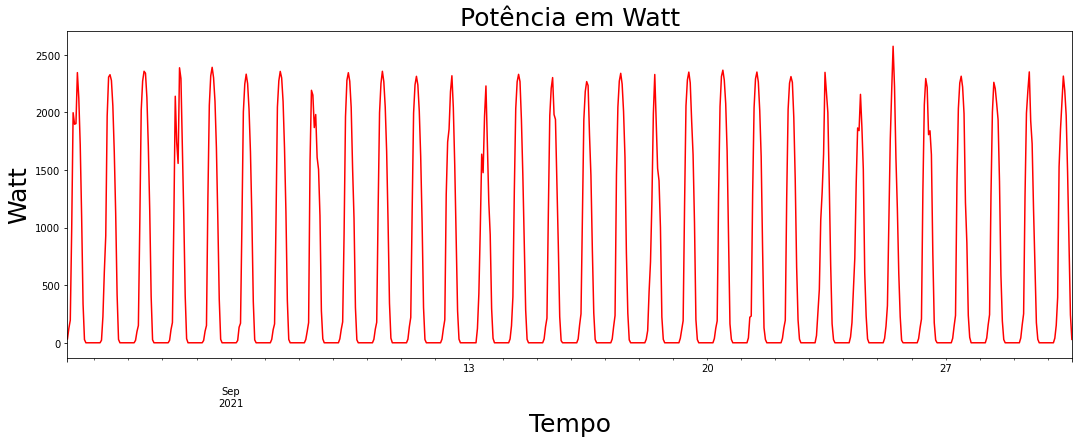

In [13]:
plt.figure(figsize=(18,6))
dados.plot(color='red')
plt.title('Potência em Watt', fontsize=25)
plt.xlabel('Tempo', fontsize=25)
plt.ylabel('Watt', fontsize=25)
plt.show()

In [14]:
from pycaret.time_series import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


**Criando o setup para os modelos** 

Colocou-se a sazonalidade horária e vamos prever 72 horas a frente.

In [15]:
serie_temporal = setup(dados,fh=72, fold=3, seasonal_period='H', fold_strategy='sliding')

,Description,Value
0,session_id,2892
1,Original Data,"(709, 1)"
2,Missing Values,False
3,Transformed Train Set,"(637,)"
4,Transformed Test Set,"(72,)"
5,Fold Generator,SlidingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,SeasonalPeriod.H
9,Seasonality Detected,True


Algumas estatísticas como quantidade de linhas de dados, média, valor-p e dentre outras.

In [16]:
check_stats()

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,709
1,Summary,Statistics,Mean,,625.071
2,Summary,Statistics,Median,,31.35
3,Summary,Statistics,Standard Deviation,,864.677
4,Summary,Statistics,Variance,,747666
5,Summary,Statistics,Kurtosis,,-0.782639
6,Summary,Statistics,Skewness,,0.964529
7,Summary,Statistics,# Distinct Values,,390
8,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 24}",4796.77
9,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 48}",9415.73


**Setando a métrica que se deseja analisar e comparando os modelos**

In [17]:
melhor_modelo = compare_models(sort= 'RMSE', n_select=2)

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2,TT (Sec)
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,64.0039,115.456,2.59567e+16,1.0392,1.0059,0.9781,5.5233
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,71.6333,116.105,4.40129e+16,1.1001,1.1273,0.9786,0.2700
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,77.3945,120.839,5.75631e+16,1.1026,1.2159,0.9774,0.0400
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,77.871,121.006,5.99698e+16,1.0984,1.2234,0.9773,0.0400
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,77.8744,121.007,5.99856e+16,1.0984,1.2234,0.9773,0.0367
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,77.8783,121.008,6.00035e+16,1.0983,1.2235,0.9773,0.0400
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,77.8783,121.008,6.00035e+16,1.0983,1.2235,0.9773,0.0367
lar_cds_dt,Least Angular Regressor w/ Cond. Deseasonalize...,77.9403,121.062,6.03375e+16,1.0978,1.2244,0.9773,0.0400
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,78.2052,121.577,5.74154e+16,1.1182,1.2285,0.9773,0.0400
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,78.4623,121.588,5.85209e+16,1.1187,1.2327,0.9773,0.0433


**Modelo com melhor resultado de RMSE**

In [18]:
rf_cds_dt_model = create_model('rf_cds_dt')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-09-18 17:00,49.3398,67.4287,3.988739e+16,1.0501,0.7750,0.9944
1,2021-09-21 17:00,78.1795,168.1780,9.721632e+15,1.0173,1.2627,0.9565
2,2021-09-24 17:00,64.4924,110.7600,2.826102e+16,1.0502,0.9798,0.9833
Mean,NaN,64.0039,115.4556,2.595668e+16,1.0392,1.0059,0.9781
SD,NaN,11.7788,41.2645,1.242244e+16,0.0155,0.1999,0.0159


**Dados de treino e teste**

In [19]:
plot_model(rf_cds_dt_model, plot='train_test_split')

In [20]:
#Visualização da série temporal e das previsões dos últimos 3 dias (72 horas)
plot_model(rf_cds_dt_model)

**O modelo rf_cds_dt tunado teve resultado um pouco pior**


 



In [21]:
rf_cds_dt_tuned = tune_model(rf_cds_dt_model)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-09-18 17:00,63.9480,82.4129,6.391958e+16,1.1478,1.0045,0.9917
1,2021-09-21 17:00,83.3372,165.1084,8.010560e+15,1.0555,1.3460,0.9581
2,2021-09-24 17:00,65.2313,111.2776,3.978911e+16,1.0426,0.9910,0.9831
Mean,NaN,70.8389,119.5997,3.723975e+16,1.0820,1.1139,0.9776
SD,NaN,8.8532,34.2693,2.289584e+16,0.0468,0.1643,0.0142


In [22]:
#Plot do modelo rf_cds_dt tunado
plot_model(rf_cds_dt_tuned)

**Criação do modelo prophet para previsão da série temporal**

In [23]:
prophet_model = create_model('prophet', freq='H')

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-09-18 17:00:00,115.2642,148.3070,1.330798e+17,1.1849,1.8106,0.9730
1,2021-09-21 17:00:00,114.6068,168.8113,1.106741e+17,1.1527,1.8511,0.9562
2,2021-09-24 17:00:00,126.7601,158.6810,1.701966e+17,1.2276,1.9258,0.9657
Mean,NaT,118.8770,158.5998,1.379835e+17,1.1884,1.8625,0.9650
SD,NaT,5.5806,8.3710,2.454611e+16,0.0307,0.0477,0.0069


In [24]:
#Gráfico do modelo prophet
plot_model(prophet_model)

**Modelo prophet tunado**

In [25]:
prophet_tunado = tune_model(prophet_model)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-09-18 17:00:00,130.1167,169.3517,1.321041e+17,1.1656,2.0439,0.9648
1,2021-09-21 17:00:00,128.0379,175.5170,1.662865e+17,1.1412,2.0680,0.9527
2,2021-09-24 17:00:00,115.7270,155.8218,1.280646e+17,1.1234,1.7582,0.9669
Mean,NaT,124.6272,166.8968,1.421518e+17,1.1434,1.9567,0.9615
SD,NaT,6.3503,8.2258,1.714536e+16,0.0173,0.1407,0.0063


In [26]:
plot_model(prophet_tunado)

**Junção dos melhores modelos com a intenção de conseguir melhores resultados**

In [27]:
junção = blend_models(melhor_modelo)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-09-18 17:00,51.8176,69.8451,4.002101e+16,1.0954,0.8140,0.9940
1,2021-09-21 17:00,81.4562,165.3295,1.338011e+16,1.0702,1.3157,0.9580
2,2021-09-24 17:00,61.8627,107.4208,2.572595e+16,1.0277,0.9399,0.9843
Mean,NaN,65.0455,114.1985,2.637569e+16,1.0644,1.0232,0.9788
SD,NaN,12.3075,39.2748,1.088580e+16,0.0279,0.2131,0.0152


In [28]:
plot_model(junção)

**Finalização do modelo com rf_cds_dt com sua descrição**

In [29]:
final_model_rf_cds_dt = finalize_model(rf_cds_dt_model)

In [30]:
final_model_rf_cds_dt

BaseCdsDtForecaster(degree=1, deseasonal_model='additive',
                    regressor=RandomForestRegressor(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    criterion='mse',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100, 

**Previsão de valores futuros com o modelo rf_cds_dt (últimos 3 dias)** 

In [31]:
plot_model(final_model_rf_cds_dt, plot='forecast')

**Finalização do modelo conjunto e suas previsões futuras**

In [32]:
final_model_junção = finalize_model(junção)

In [33]:
final_model_junção

_EnsembleForecasterWithVoting(forecasters=[('RandomForestRegressor',
                                            BaseCdsDtForecaster(degree=1,
                                                                deseasonal_model='additive',
                                                                regressor=RandomForestRegressor(bootstrap=True,
                                                                                                ccp_alpha=0.0,
                                                                                                criterion='mse',
                                                                                                max_depth=None,
                                                                                                max_features='auto',
                                                                                                max_leaf_nodes=None,
                                                                                  

In [34]:
plot_model(final_model_junção, plot='forecast')

#O melhor modelo foi o rf_cds_dt, mas com a junção dos modelos o erro RMSE reduziu em relação ao rf_cds_dt (Para uma valor praticamente igual).